In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading yolo model
net = cv2.dnn.readNetFromDarknet('yolov3_custom.cfg','yolov3_custom_6000.weights')

In [4]:
classes = ['Goggles','Mask','Helmet']

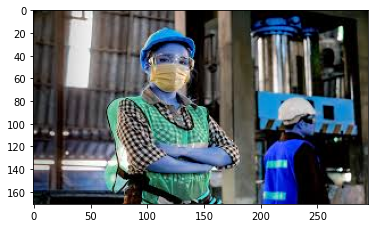

In [13]:
my_img = cv2.imread('imgs/img00011.jpg')
plt.imshow(my_img)

In [14]:
ht,wt,_ = my_img.shape
blop = cv2.dnn.blobFromImage(my_img,1/255,(416,416),swapRB = True,crop = False)
net.setInput(blop)
last_layer = net.getUnconnectedOutLayersNames()
layer_out = net.forward(last_layer)
#layer_out[0][0] # here is the bounding box
#layer_out[0].shape #secod argument is no classes plus 5

In [15]:
boxes = []
confidences = []
class_ids = []

for output in layer_out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:         #condifence
            center_x = int(detection[0]*wt)
            center_y = int(detection[1]*ht)
            w = int(detection[2]*wt)
            h = int(detection[3]*ht)
            
            x= int(center_x - w/2)
            y= int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
front = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))
if len(indexes) == 0:
    print("El modelo no predijo NADA de la imagen")
else:
    for i in indexes.flatten():
        print("El modelo predijo: {}".format(str(classes[class_ids[i]])))

El modelo predijo: Mask


c:\users\manu\desktop\face_detection\predic\virt_env\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [16]:
# imprimo la imagen con el rectangulo de prediccion
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img,label +" "+confidence,(x,y+20),front,2,(0,0,0),2)

cv2.imshow('imgs/img00003.jpg',my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()